In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


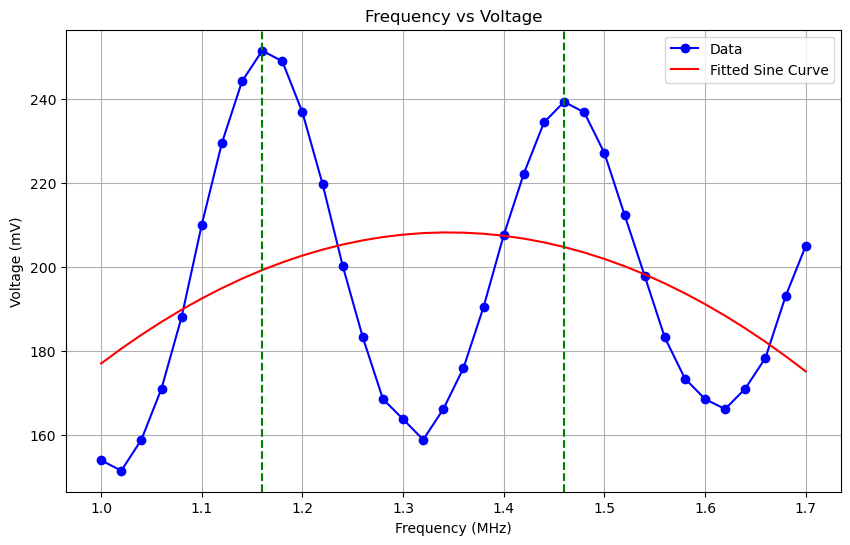

In [19]:

# Step 1: Read data from Excel file
# Replace 'data.xlsx' with your Excel file path
df = pd.read_excel('RF Transmission Table 2.xlsx')

# Step 2: Extract Frequency and Voltage columns
frequency = df['Frequency(MHz)']
voltage = df['V(mV)']

# Step 3: Define sine function to fit the data
def sine_func(x, A, f, phi, offset):
    return A * np.sin(2 * np.pi * f * x + phi) + offset

# Step 4: Fit the sine function to the data
popt, _ = curve_fit(sine_func, frequency, voltage, p0=[max(voltage)-min(voltage), 1, 0, np.mean(voltage)])

# Step 5: Create a plot of the data and the fitted sine curve
plt.figure(figsize=(10,6))
plt.plot(frequency, voltage, label='Data', marker='o', linestyle='-', color='b')
plt.plot(frequency, sine_func(frequency, *popt), label='Fitted Sine Curve', color='r')

# Step 6: Find the maxima points
maxima = []
for i in range(1, len(frequency)-1):
    if voltage[i-1] < voltage[i] > voltage[i+1]:
        maxima.append(frequency[i])

# Step 7: Mark the maxima with vertical lines
for max_point in maxima:
    plt.axvline(x=max_point, color='g', linestyle='--')

# Step 8: Label the plot
plt.title('Frequency vs Voltage')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.grid(True)
plt.show()


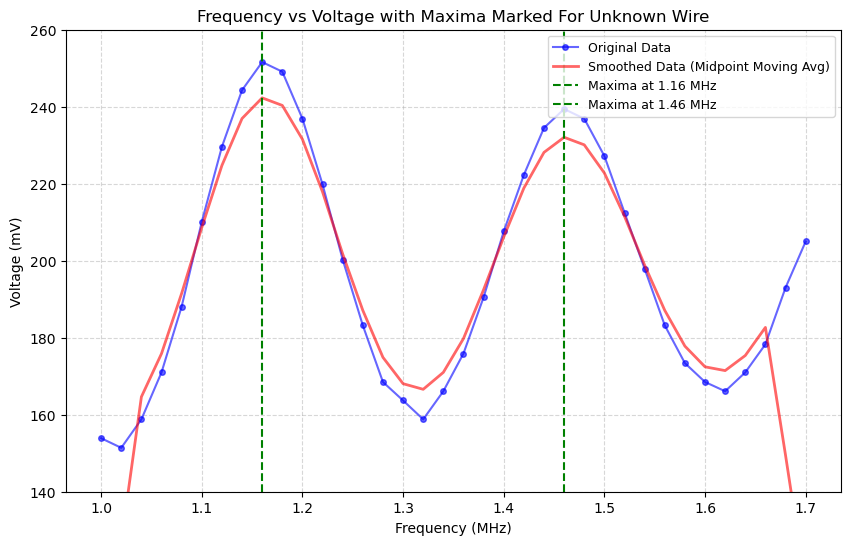

In [18]:

# Step 2: Extract Frequency and Voltage columns
frequency = df['Frequency(MHz)']
voltage = df['V(mV)']

# Step 3: Apply midpoint moving average to smooth the data (e.g., window size = 5)
window_size = 5
smoothed_voltage = np.convolve(voltage, np.ones(window_size)/window_size, mode='same')

# Step 4: Find local maxima
maxima = []
for i in range(1, len(frequency)-1):
    if voltage[i-1] < voltage[i] > voltage[i+1]:  # Local maxima
        maxima.append(frequency[i])

# Step 5: Plot the data
plt.figure(figsize=(10,6))

# Original data
plt.plot(frequency, voltage, label='Original Data', marker='o', linestyle='-', color='b', markersize=4, alpha=0.6)

# Smoothed data
plt.plot(frequency, smoothed_voltage, label='Smoothed Data (Midpoint Moving Avg)', color='r', linewidth=2, alpha=0.6)

# Step 6: Mark the maxima with vertical lines
for max_point in maxima:
    plt.axvline(x=max_point, color='g', linestyle='--', label=f'Maxima at {max_point} MHz')

# Step 7: Label the plot
plt.title('Frequency vs Voltage with Maxima Marked For Unknown Wire')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Voltage (mV)')
plt.legend(loc='upper right', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(140,260)
# Step 8: Show the plot
plt.show()


In [25]:
import pandas as pd

# Read the CSV file and skip the first 5 rows
file_path = 'whitenoise.csv'
data = pd.read_csv(file_path, skiprows=5)

# Display the resulting DataFrame as a table
print(data)

# Read the CSV file and skip the first 5 rows
file_path = 'With wire300m.csv'
data = pd.read_csv(file_path, skiprows=5)

# Display the resulting DataFrame as a table
print(data)


     % Frequency (Hz)   Input A (dBm)
0       -2.929685e+04       -30.24477
1        1.220731e+03       -30.39388
2        3.173831e+04       -30.29954
3        6.225589e+04       -30.22914
4        9.277347e+04       -30.35580
..                ...             ...
980      2.987793e+07       -43.73642
981      2.990845e+07       -43.72704
982      2.993896e+07       -43.72956
983      2.996948e+07       -43.72101
984      3.000000e+07       -43.75069

[985 rows x 2 columns]
     % Frequency (Hz)   Input A (dBm)
0       -2.929685e+04       -32.55521
1        1.220731e+03       -31.92659
2        3.173831e+04       -32.18328
3        6.225589e+04       -33.34417
4        9.277347e+04       -35.41672
..                ...             ...
980      2.987793e+07       -50.88457
981      2.990845e+07       -50.90118
982      2.993896e+07       -50.92776
983      2.996948e+07       -50.91654
984      3.000000e+07       -50.86103

[985 rows x 2 columns]


In [13]:
2*13.8*(7*10**6)/(3*10**8)

0.644

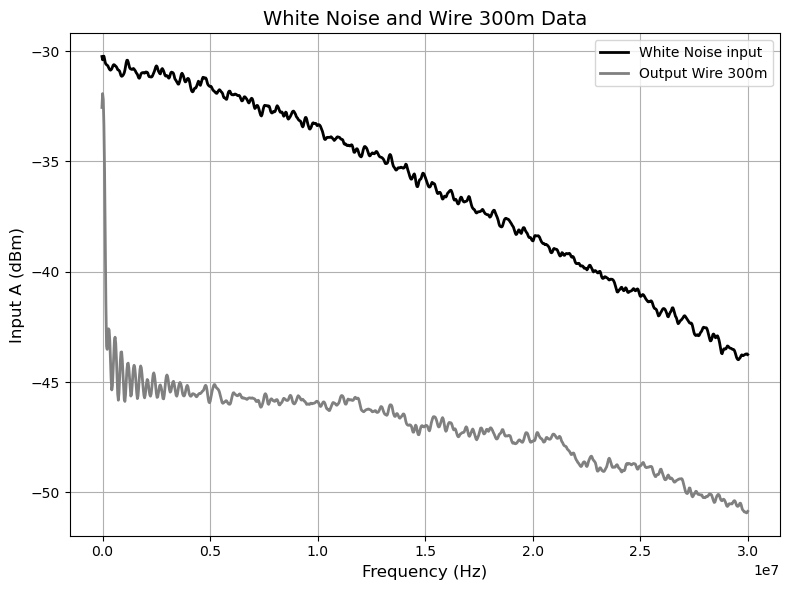

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two CSV files, skipping the first 5 rows
whitenoise_file = 'whitenoise.csv'
wire_file = 'With wire300m.csv'

whitenoise_data = pd.read_csv(whitenoise_file, skiprows=5)
wire_data = pd.read_csv(wire_file, skiprows=5)

# Access the columns by their index
# Assuming the first column (index 0) is frequency and the second column (index 1) is 'Input A (dBm)'
freq_whitenoise = whitenoise_data.iloc[:, 0]
input_a_whitenoise = whitenoise_data.iloc[:, 1]

freq_wire = wire_data.iloc[:, 0]
input_a_wire = wire_data.iloc[:, 1]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the whitenoise data
plt.plot(freq_whitenoise, input_a_whitenoise, label="White Noise input", color='black', linewidth=2)

# Plot the wire data
plt.plot(freq_wire, input_a_wire, label="Output Wire 300m", color='gray', linewidth=2)

# Add labels and title
plt.xlabel("Frequency (Hz)", fontsize=12)
plt.ylabel("Input A (dBm)", fontsize=12)
plt.title("White Noise and Wire 300m Data", fontsize=14)

# Add a legend
plt.legend()

# Customize the grid and axis
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


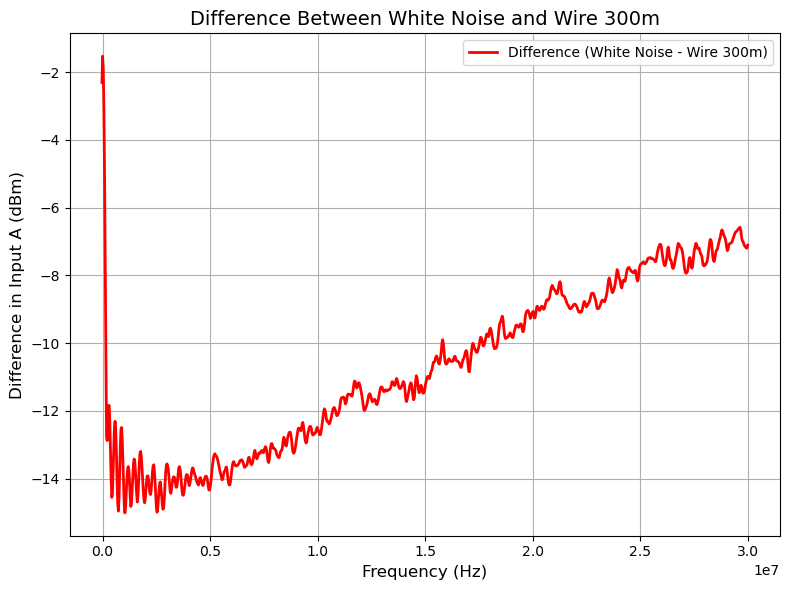

In [31]:


# Calculate the difference between the input white noise and the output (wire)
difference =  input_a_wire - input_a_whitenoise

# Create the plot for the difference
plt.figure(figsize=(8, 6))

# Plot the difference
plt.plot(freq_whitenoise, difference, label="Difference (White Noise - Wire 300m)", color='red', linewidth=2)

# Add labels and title
plt.xlabel("Frequency (Hz)", fontsize=12)
plt.ylabel("Difference in Input A (dBm)", fontsize=12)
plt.title("Difference Between White Noise and Wire 300m", fontsize=14)

# Add a legend
plt.legend()

# Customize the grid and axis
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


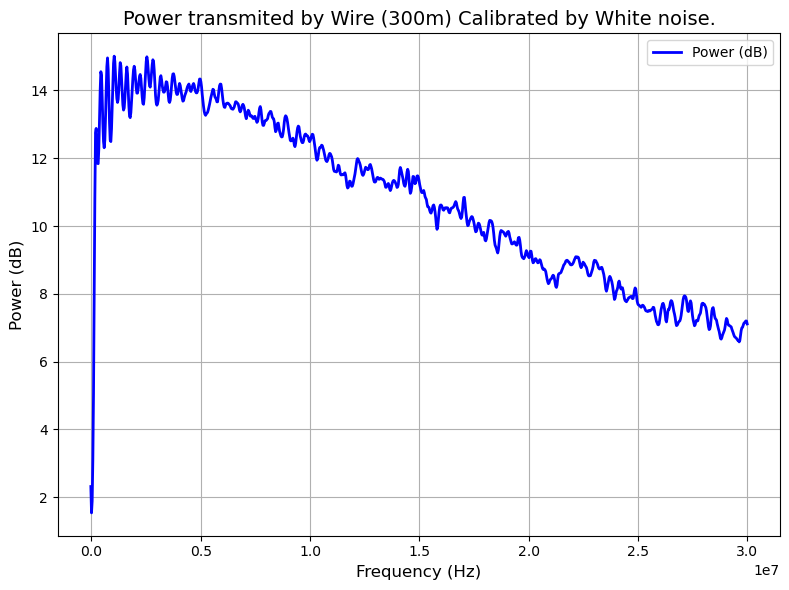

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two CSV files, skipping the first 5 rows
whitenoise_file = 'whitenoise.csv'
wire_file = 'With wire300m.csv'

whitenoise_data = pd.read_csv(whitenoise_file, skiprows=5)
wire_data = pd.read_csv(wire_file, skiprows=5)

# Access the columns by their index (Frequency and Input A (dBm) columns)
freq_whitenoise = whitenoise_data.iloc[:, 0]
input_a_whitenoise = whitenoise_data.iloc[:, 1]

freq_wire = wire_data.iloc[:, 0]
input_a_wire = wire_data.iloc[:, 1]

# Find common frequencies between both datasets
common_freqs = pd.Series(freq_whitenoise).isin(freq_wire)

# Filter the data to only keep the common frequencies
freq_common = freq_whitenoise[common_freqs]
input_a_common_whitenoise = input_a_whitenoise[common_freqs]
input_a_common_wire = input_a_wire[common_freqs]

# Calculate the attenuation in dB
attenuation = input_a_common_whitenoise - input_a_common_wire

# Create the plot for attenuation
plt.figure(figsize=(8, 6))

# Plot the attenuation
plt.plot(freq_common, attenuation, label="Power (dB)", color='blue', linewidth=2)

# Add labels and title
plt.xlabel("Frequency (Hz)", fontsize=12)
plt.ylabel("Power (dB)", fontsize=12)
plt.title("Power transmited by Wire (300m) Calibrated by White noise.", fontsize=14)

# Add a legend
plt.legend()

# Customize the grid and axis
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
